In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_squared_log_error, mean_tweedie_deviance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from tqdm import tqdm
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
        explained_variance_score, mean_squared_log_error, mean_tweedie_deviance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import make_scorer
from itertools import permutations
from scipy.special import comb
import random

In [98]:
COLUMNS_FEATURES =  [
  'var_middle_number', 'this_find_number',
  'string_concat_number', 'instance_of_number',
  'method_chain_number', 'var_decl_diff_number_11', 
  'var_decl_diff_number_7', 'var_decl_diff_number_5', 
  'super_method_call_number', 'force_type_cast_number',
  'entropy', 'halstead volume', 'ncss_lightweight',
  'left_spaces_var','right_spaces_var','max_left_diff_spaces',
  'max_right_diff_spaces', 'asserts_number', 'setter_number',
  'empty_rethrow_number', 'prohibited_class_names_number',
  'return_in_if_number', 'impl_multi_number',
  'many_prim_ctors_number','multiple_try_number',
  'non_final_field_number','null_check_number',
  'part_sync_number','red_catch_number',
  'return_null_number'
]

ONLY_PATTERNS = ['var_middle_number', 'this_find_number','string_concat_number', 'instance_of_number',
'method_chain_number', 'var_decl_diff_number_11', 'var_decl_diff_number_7', 'var_decl_diff_number_5', 
'super_method_call_number', 'force_type_cast_number','asserts_number', 'setter_number', 'empty_rethrow_number', 
'prohibited_class_names_number', 'return_in_if_number', 'impl_multi_number',
'many_prim_ctors_number','multiple_try_number', 'non_final_field_number','null_check_number', 
'part_sync_number','red_catch_number', 'return_null_number']


FEATURES_NUMBER = len(ONLY_PATTERNS)
FEATURES_NUMBER

23

In [0]:
scale_ncss=False
scale=False
# import and initialize dataset
df = pd.read_csv('dataset8.csv')
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss_lightweight > 20) & (df.ncss_lightweight < 100) & (df.npath_method_avg < 100000.00) & (df.cyclo < 50) & (df.cyclo > 4)].copy().reset_index()
df.rename(columns = {'for_type_cast_number':'force_type_cast_number'}, inplace = True) 
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
Y = df[['cyclo']].copy().values
if scale_ncss:
    new = pd.DataFrame(df[COLUMNS_FEATURES].values / df['ncss_lightweight'].values.reshape((-1, 1)))
else:
    new = df[COLUMNS_FEATURES].copy()
if scale:
  X = pd.DataFrame(StandardScaler().fit_transform(new.values), columns=new.columns, index=new.index).values
else:
  X = new

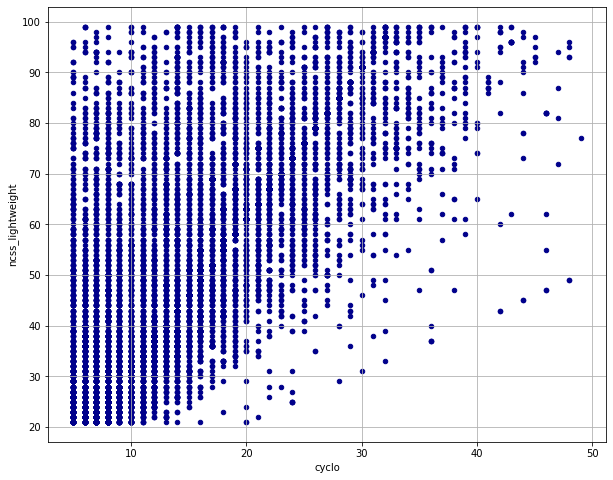

In [100]:
df.plot.scatter(x='cyclo', y='ncss_lightweight', c='DarkBlue', figsize=(10,8), grid=True)

In [0]:
indices = X.index.values.tolist()
perm = permutations(indices, 2)

Check permutation

In [0]:
for x, y in perm:
  print(x, y)
  item = X.loc[1, :]
  print(item)
  break

Check whether the same indices retrieve the same data for *df* and *X*

In [0]:
for x, y in perm:
  f_item = X.loc[x, :].values.tolist()
  s_item = X.loc[y, :].values.tolist()
  print(f_item, s_item)
  print(X.loc[x, :].values.tolist() + X.loc[y, :].values.tolist())
  print(df.loc[x, :][['var_middle_number', 'this_find_number',
  'string_concat_number', 'instance_of_number',
  'method_chain_number', 'var_decl_diff_number_11', 
  'var_decl_diff_number_7', 'var_decl_diff_number_5', 
  'super_method_call_number', 'force_type_cast_number',
  'entropy', 'halstead volume', 'ncss_lightweight',
  'left_spaces_var','right_spaces_var','max_left_diff_spaces',
  'max_right_diff_spaces', 'asserts_number', 'setter_number',
  'empty_rethrow_number', 'prohibited_class_names_number',
  'return_in_if_number', 'impl_multi_number',
  'many_prim_ctors_number','multiple_try_number',
  'non_final_field_number','null_check_number',
  'part_sync_number','red_catch_number',
  'return_null_number']])
  break

In [0]:
matrix = []
def to_bool(s):
    return 1 if s else 0

In [161]:
comb(9, 2), comb(10, 2), comb(5, 2)

(36.0, 45.0, 10.0)

# Find the sum of C_*n_k* which is the closest to the input data

In [0]:
def calc_closest_dataset_size(dataset_size):
  target = 0
  if dataset_size < 1:
    return 0

  for x in range(1, dataset_size + 1):
    total_val = comb(x, 2)
    # print(total_val, dataset_size)
    if total_val > dataset_size:
      target = x - 1
      break
    elif total_val == dataset_size:
      target = x
  return target

Some tests for the mentioned function

In [187]:
calc_closest_dataset_size(2)

0.0 2


0

In [202]:
calc_closest_dataset_size(3), calc_closest_dataset_size(10), calc_closest_dataset_size(40), calc_closest_dataset_size(7945), calc_closest_dataset_size(498000),calc_closest_dataset_size(54515)

(3, 5, 9, 126, 998, 330)

In [198]:
print(comb(1, 2), comb(2, 2), comb(3, 2))
print(comb(3, 2), comb(5, 2), comb(4, 2))
print(comb(9, 2), comb(10, 2) ,comb(11, 2))
print(comb(126, 2), comb(127, 2) , comb(128, 2))
print(comb(998, 2), comb(999, 2), comb(1000, 2))
print(comb(330, 2), comb(331, 2), comb(332, 2))

0.0 1.0 3.0
3.0 10.0 6.0
36.0 45.0 55.0
7875.0 8001.0 8128.0
497503.0 498501.0 499500.0
54285.0 54615.0 54946.0


In [259]:
indices = []
desired_dataset_size = 100000
real_patterns_number = calc_closest_dataset_size(desired_dataset_size)
print('You set {} values for dataset, but since we have C_{}_2 (combinations), we will get only dataset with {} size due to pairwise comparison between each pattern'.format(desired_dataset_size, desired_dataset_size, real_patterns_number))

You set 100000 values for dataset, but since we have C_100000_2 (combinations), we will get only dataset with 447 size due to pairwise comparison between each pattern


In [260]:
random_indices = random.sample(X.index.tolist(), real_patterns_number)
random_indices

[7200,
 3585,
 1245,
 8051,
 3652,
 9536,
 1030,
 6558,
 10654,
 10596,
 10229,
 2527,
 5822,
 9641,
 3554,
 3707,
 2812,
 4957,
 4459,
 2732,
 10322,
 36,
 1181,
 8138,
 3348,
 11960,
 2309,
 9495,
 4059,
 8217,
 6203,
 1807,
 311,
 794,
 9039,
 209,
 11059,
 3102,
 5309,
 3632,
 1383,
 7326,
 7338,
 8502,
 8463,
 6099,
 5755,
 10273,
 9679,
 11876,
 11398,
 7300,
 7185,
 9515,
 9951,
 2522,
 2121,
 10303,
 1205,
 1158,
 6468,
 9074,
 6813,
 9871,
 3648,
 3385,
 11551,
 7375,
 8256,
 2459,
 5837,
 1690,
 10732,
 1742,
 3642,
 7925,
 9323,
 10212,
 2488,
 8263,
 12067,
 3782,
 6614,
 10963,
 6594,
 4981,
 236,
 4303,
 10154,
 12228,
 625,
 10720,
 6748,
 6875,
 2987,
 3740,
 11149,
 2596,
 2772,
 240,
 3926,
 6151,
 1858,
 1649,
 11324,
 11109,
 2746,
 6613,
 10449,
 12344,
 7642,
 3495,
 705,
 7272,
 11191,
 6547,
 10258,
 10614,
 3895,
 9600,
 4063,
 8924,
 6418,
 3747,
 7073,
 7992,
 4864,
 6763,
 2982,
 7934,
 10817,
 988,
 7699,
 10199,
 12146,
 11761,
 7855,
 8388,
 6323,
 5121,


In [0]:
perms = permutations(random_indices, 2)
lst = list(perms)

In [262]:
matrix = []
iter = 0
for _, val in tqdm(enumerate(lst), total=len(lst)):
  # print(_)
  x, y = val[0], val[1]
  # print(x, y)
  # print(iter)
  left_patterns = X.loc[x, :].values.tolist()
  right_patterns = X.loc[y, :].values.tolist()
  row = left_patterns + right_patterns
  # print(row)
  target_left = df.loc[x, :]['cyclo']
  target_right = df.loc[y, :]['cyclo']
  target_cyclo = to_bool(target_left < target_right)
  matrix.append(row + [target_cyclo])
  # iter += 1

Streaming output truncated to the last 5000 lines.
 28%|██▊       | 55342/199362 [01:05<02:47, 859.90it/s]


 28%|██▊       | 55429/199362 [01:05<02:47, 857.58it/s]


 28%|██▊       | 55516/199362 [01:05<02:47, 860.30it/s]


 28%|██▊       | 55603/199362 [01:05<02:51, 836.39it/s]


 28%|██▊       | 55687/199362 [01:05<02:52, 834.95it/s]


 28%|██▊       | 55773/199362 [01:05<02:50, 839.75it/s]


 28%|██▊       | 55864/199362 [01:05<02:47, 858.09it/s]


 28%|██▊       | 55958/199362 [01:05<02:42, 879.92it/s]


 28%|██▊       | 56047/199362 [01:05<02:43, 876.61it/s]


 28%|██▊       | 56135/199362 [01:05<02:44, 871.28it/s]


 28%|██▊       | 56223/199362 [01:06<02:47, 854.14it/s]


 28%|██▊       | 56309/199362 [01:06<02:49, 841.74it/s]


 28%|██▊       | 56397/199362 [01:06<02:47, 851.64it/s]


 28%|██▊       | 56485/199362 [01:06<02:46, 857.46it/s]


 28%|██▊       | 56573/199362 [01:06<02:45, 863.15it/s]


 28%|██▊       | 56665/199362 [01:06<02:42, 876.74it/s]


 28%|██▊       | 5675

In [0]:
matrix[1:4]

In [0]:
import csv

with open("out.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(matrix)

In [0]:
    # x = random.randrange(dataset_size)
    # y = dataset_size
    # row = X.loc[x, :].values.tolist() + X.loc[y, :].values.tolist()
    # target_left = df.loc[x, :]['cyclo']
    # target_right = df.loc[y, :]['cyclo']
    # target_cyclo = to_bool(target_left < target_right)
    # matrix.append(row + [target_cyclo])
    # #print(target_cyclo)
    # #break

In [104]:
# X.shape

(12330, 30)

In [0]:
# def generate_values_for_dataset(dataset, dataset_size):
#   combinations_number = comb(dataset.shape[0], 2)
#   for i in range(dataset_scomb(100,48)ize):
#     %timeit comb(100,48)


In [96]:
# for x, y in perm:
#   row = X.loc[x, :].values.tolist() + X.loc[y, :].values.tolist()
#   target_left = df.loc[x, :]['cyclo']
#   target_right = df.loc[y, :]['cyclo']
#   target_cyclo = to_bool(target_left < target_right)
#   matrix.append(row + [target_cyclo])
#   #print(target_cyclo)
#   #break

KeyboardInterrupt: ignored

In [0]:
# parameters = {'kernel':('rbf',), 'C':[1., 10., 0.1]}
# svr = SVR()
# clf = GridSearchCV(svr, parameters, scoring=make_scorer(r2_score), cv=5)
# clf.fit(X_train, y_train.reshape(-1))


# y_pred = clf.predict(X_test)
# print_scores(y_test, y_pred)